In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier # 隨機森林
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
train.shape

(891, 12)

In [3]:
test.shape

(418, 11)

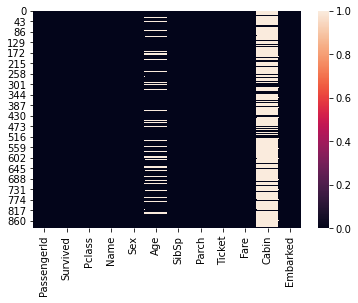

In [4]:
sns.heatmap(train.isnull())

In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

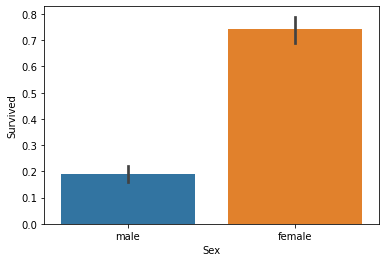

In [6]:
sns.barplot(x="Sex",y="Survived",data=train)

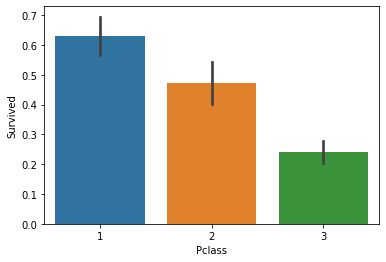

In [7]:
sns.barplot(x="Pclass",y="Survived",data=train)

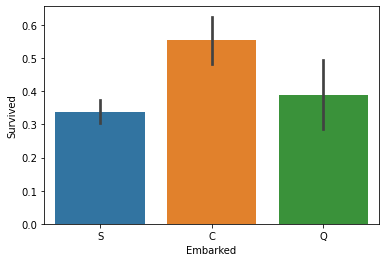

In [8]:
sns.barplot(x="Embarked",y="Survived",data=train)

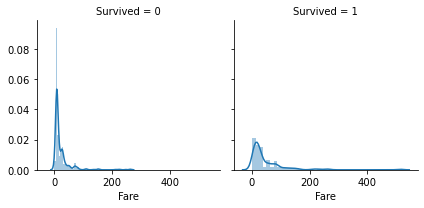

In [9]:
g = sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'Fare')

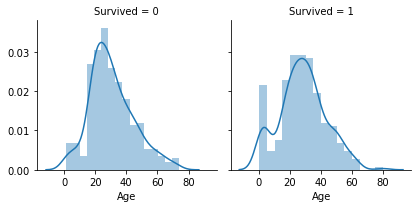

In [10]:
g = sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'Age')

In [11]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [12]:
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(test["Age"].median())


In [13]:
train["Fare"] = train["Fare"].fillna(train["Fare"].mean())
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())

In [14]:
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1
test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

In [15]:
train["Embarked"] = train["Embarked"].fillna("S")
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2
test["Embarked"] = test["Embarked"].fillna("S")
test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2


In [16]:
predictors = ["Pclass", "Sex", "Age","Fare", "Embarked"]

In [17]:
RFC = RandomForestClassifier(random_state=3,
                             n_estimators=120,
                             min_samples_split=20,
                             oob_score=True)
RFC.fit(train[predictors], train["Survived"])
print(RFC.oob_score_)

0.8305274971941639


In [18]:
pred = RFC.predict(test[predictors])
submission = pd.DataFrame({
                            "PassengerId": test["PassengerId"],
                            "Survived": pred
                         })
submission.to_csv('submission.csv', index=False)